In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import json
import pygal
from datetime import datetime

In [2]:
df = pd.read_csv("caso_full.csv")
df

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,São Paulo,3550308.0,2020-02-25,9,12252023.0,False,False,1,0.00816,2020-02-25,0.0000,0,1,city,SP,1,0
1,NaN,35.0,2020-02-25,9,45919049.0,False,False,1,0.00218,2020-02-25,0.0000,0,1,state,SP,1,0
2,São Paulo,3550308.0,2020-02-26,9,12252023.0,False,False,1,0.00816,2020-02-26,0.0000,0,2,city,SP,0,0
3,NaN,35.0,2020-02-26,9,45919049.0,False,False,1,0.00218,2020-02-26,0.0000,0,2,state,SP,0,0
4,São Paulo,3550308.0,2020-02-27,9,12252023.0,False,False,1,0.00816,2020-02-27,0.0000,0,3,city,SP,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332535,NaN,43.0,2020-07-08,28,11377239.0,True,False,35557,312.52749,2020-07-08,0.0232,825,121,state,RS,1757,32
332536,NaN,42.0,2020-07-08,28,7164788.0,True,False,36810,513.76258,2020-07-08,0.0117,432,119,state,SC,1467,12
332537,NaN,28.0,2020-07-08,28,2298696.0,True,False,32490,1413.41004,2020-07-08,0.0269,875,117,state,SE,850,24
332538,NaN,35.0,2020-07-08,28,45919049.0,True,False,341365,743.40608,2020-07-08,0.0492,16788,135,state,SP,8657,313


In [3]:
count = 0
for cidade, data in zip(df["city"].values, df["date"].values):
    if cidade == "Itapeva":
        count += 1
        print("Itapeva", count.__str__(), " in date: ", data.__str__())

Itapeva 1  in date:  2020-04-07
Itapeva 2  in date:  2020-04-08
Itapeva 3  in date:  2020-04-09
Itapeva 4  in date:  2020-04-09
Itapeva 5  in date:  2020-04-10
Itapeva 6  in date:  2020-04-10
Itapeva 7  in date:  2020-04-11
Itapeva 8  in date:  2020-04-11
Itapeva 9  in date:  2020-04-12
Itapeva 10  in date:  2020-04-12
Itapeva 11  in date:  2020-04-13
Itapeva 12  in date:  2020-04-13
Itapeva 13  in date:  2020-04-14
Itapeva 14  in date:  2020-04-14
Itapeva 15  in date:  2020-04-15
Itapeva 16  in date:  2020-04-15
Itapeva 17  in date:  2020-04-16
Itapeva 18  in date:  2020-04-16
Itapeva 19  in date:  2020-04-17
Itapeva 20  in date:  2020-04-17
Itapeva 21  in date:  2020-04-18
Itapeva 22  in date:  2020-04-18
Itapeva 23  in date:  2020-04-19
Itapeva 24  in date:  2020-04-19
Itapeva 25  in date:  2020-04-20
Itapeva 26  in date:  2020-04-20
Itapeva 27  in date:  2020-04-21
Itapeva 28  in date:  2020-04-21
Itapeva 29  in date:  2020-04-22
Itapeva 30  in date:  2020-04-22
Itapeva 31  in date

In [4]:
habitantes = []
for data, cidade, populacao, confirmados in zip(df["date"].values,
                                   df["city"].values,
                                   df["estimated_population_2019"].values,
                                   df["new_confirmed"].values):
    if cidade == "Itapeva":
        if data == "2020-07-08":
            habitantes.append(populacao)
            print(data, ", com população de: ", populacao, " e com total de: ", confirmados, " confirmados.")

2020-07-08 , com população de:  9783.0  e com total de:  2  confirmados.
2020-07-08 , com população de:  94354.0  e com total de:  5  confirmados.


In [5]:
for cabecalho, valor in df.items():
    print(cabecalho, " ", valor)

city   0         São Paulo
1               NaN
2         São Paulo
3               NaN
4         São Paulo
            ...    
332535          NaN
332536          NaN
332537          NaN
332538          NaN
332539          NaN
Name: city, Length: 332540, dtype: object
city_ibge_code   0         3550308.0
1              35.0
2         3550308.0
3              35.0
4         3550308.0
            ...    
332535         43.0
332536         42.0
332537         28.0
332538         35.0
332539         17.0
Name: city_ibge_code, Length: 332540, dtype: float64
date   0         2020-02-25
1         2020-02-25
2         2020-02-26
3         2020-02-26
4         2020-02-27
             ...    
332535    2020-07-08
332536    2020-07-08
332537    2020-07-08
332538    2020-07-08
332539    2020-07-08
Name: date, Length: 332540, dtype: object
epidemiological_week   0          9
1          9
2          9
3          9
4          9
          ..
332535    28
332536    28
332537    28
332538    28
332539  

In [6]:
df.describe()

,city_ibge_code,epidemiological_week,estimated_population_2019,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,last_available_deaths,order_for_place,new_confirmed,new_deaths
count,3.307870e+05,332540.000000,3.307870e+05,332540.000000,322859.000000,332540.000000,332540.000000,332540.000000,332540.000000,332540.000000
mean,3.136614e+06,22.801230,1.383465e+05,301.499056,230.011016,0.052265,14.754375,37.419550,10.280682,0.407993
std,1.025473e+06,3.625553,1.261877e+06,3852.112996,472.978466,0.143673,230.043625,25.250687,124.538248,5.702740
min,1.100000e+01,9.000000,8.370000e+02,0.000000,0.002180,0.000000,0.000000,1.000000,-1578.000000,-82.000000
25%,2.409902e+06,20.000000,7.799000e+03,2.000000,19.376090,0.000000,0.000000,16.000000,0.000000,0.000000
50%,3.133204e+06,23.000000,1.740100e+04,10.000000,67.380400,0.000000,0.000000,34.000000,0.000000,0.000000
75%,4.105409e+06,26.000000,3.937800e+04,48.000000,231.787575,0.042600,2.000000,55.000000,2.000000,0.000000
max,5.300108e+06,28.000000,4.591905e+07,341365.000000,12695.430860,1.000000,16788.000000,135.000000,19030.000000,434.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332540 entries, 0 to 332539
Data columns (total 17 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   city                                           329350 non-null  object 
 1   city_ibge_code                                 330787 non-null  float64
 2   date                                           332540 non-null  object 
 3   epidemiological_week                           332540 non-null  int64  
 4   estimated_population_2019                      330787 non-null  float64
 5   is_last                                        332540 non-null  bool   
 6   is_repeated                                    332540 non-null  bool   
 7   last_available_confirmed                       332540 non-null  int64  
 8   last_available_confirmed_per_100k_inhabitants  322859 non-null  float64
 9   last_available_date                  

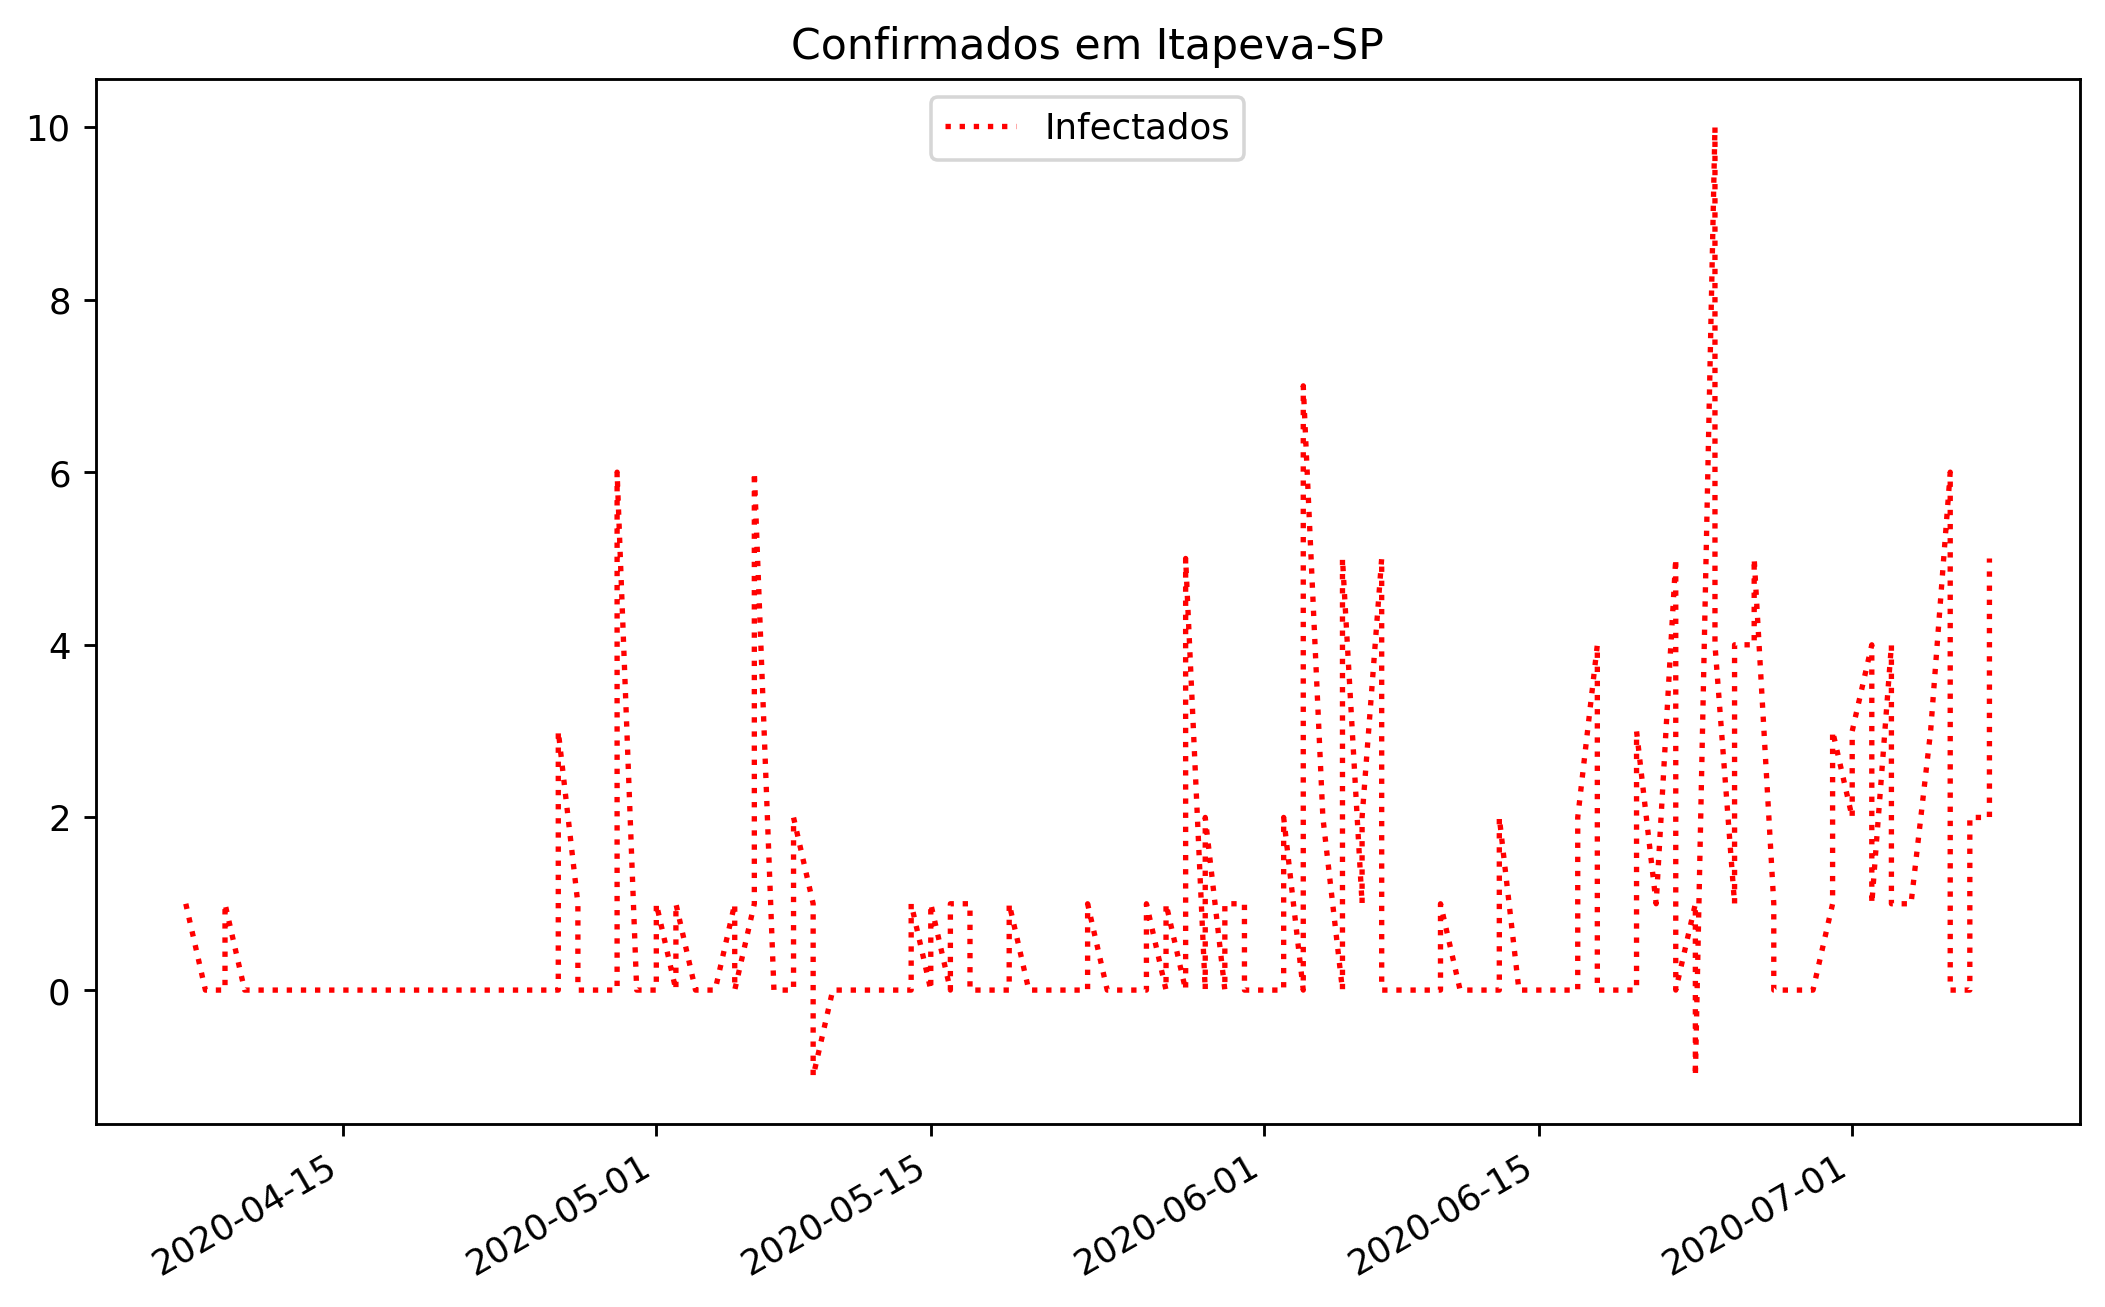

In [22]:
datas = []
confirmados = []
for cidade, data, confirmado in zip(df["city"].values, df["date"].values, df["new_confirmed"].values):
    if cidade == "Itapeva":
        date = datetime.strptime(data, "%Y-%m-%d")
        datas.append(date)
        confirmados.append(confirmado)

fig = plt.figure(dpi=256, figsize=(10, 6))
plt.title("Confirmados em Itapeva-SP")
plt.plot(datas, confirmados, "r:", label="Infectados")
plt.legend(loc=9)
plt.xlabel("")
fig.autofmt_xdate()
plt.savefig("covid_itapeva.png")
plt.show()

In [9]:
pyBar = pygal.Bar()
pyBar.title = "Coronavirus em Itapeva-SP"
pyBar._x_title = "Data"
pyBar.x_labels = datas
# pyBar.y_title = "Infectados"
pyBar.add("infectados", confirmados)
pyBar.render_to_file("infectados_itapeva.svg")

In [18]:
datas, confirmados = [], []
for cidade, data, confirmado in zip(df["city"].values, df["date"].values, df["new_confirmed"].values):
    if cidade == "Curitiba":
        date = datetime.strptime(data, "%Y-%m-%d")
        datas.append(date)
        confirmados.append(confirmado)

In [13]:
pyBar = pygal.Bar()
pyBar.title = "Comparação casos de COVID-19 por dia"
pyBar._x_title = "Datas"
pyBar._y_title = "Casos de COVID"
pyBar.x_labels = datas
pyBar.add("São Paulo", confirmados)
pyBar.render_to_file("comparação_covid_brasil.svg")

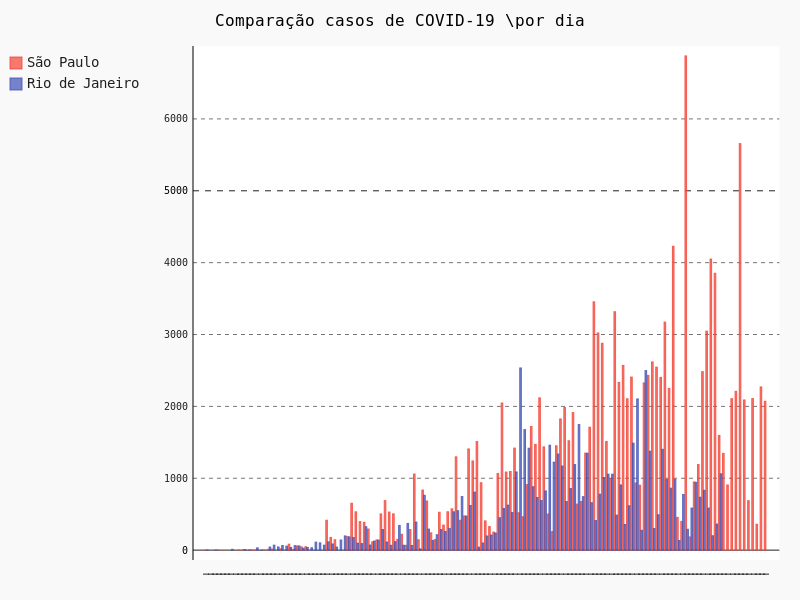

In [15]:
pyBar.add("Rio de Janeiro", confirmados)


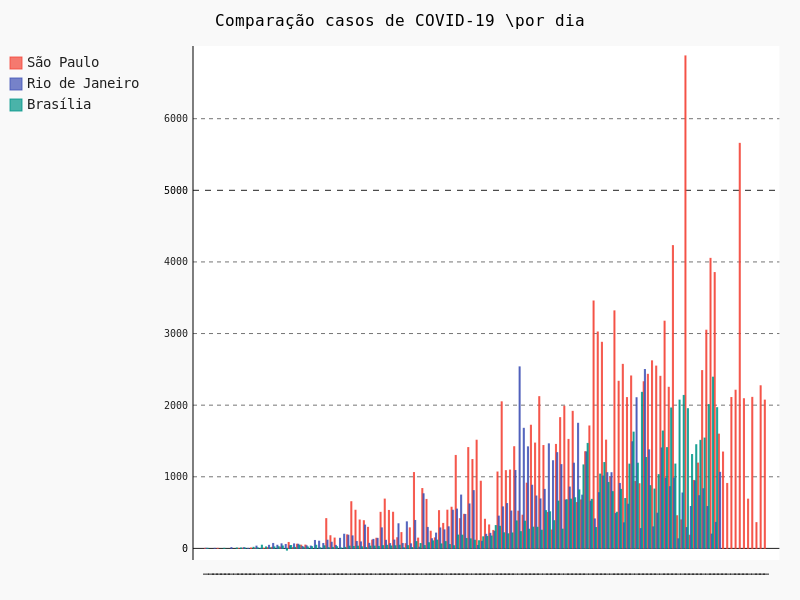

In [17]:
pyBar.add("Brasília", confirmados)

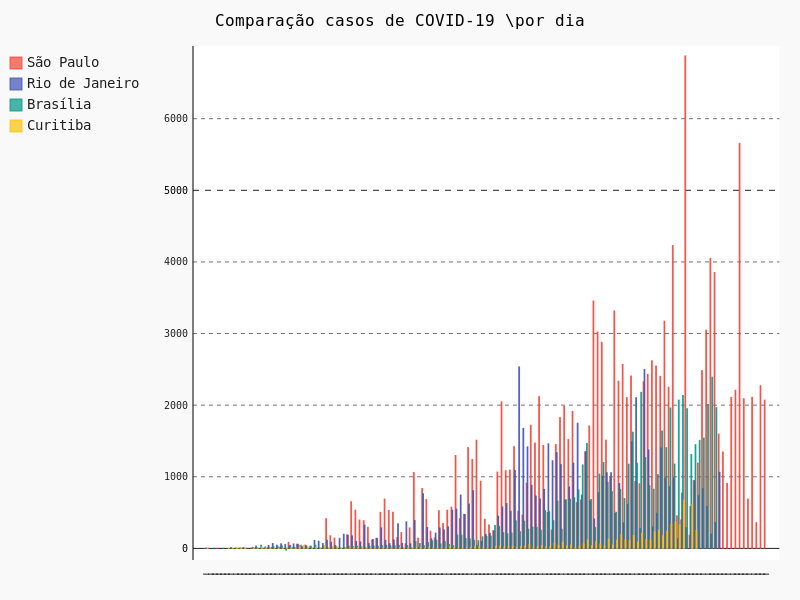

In [19]:
pyBar.add("Curitiba", confirmados)

In [20]:
pyBar.render_to_file("comparação_covid_brasil.svg")